# Example for modeling part load behavior

In this application of the ETHOS.FINE framework, a hydrogen system is modeled and optimized considering partload behavior of the electrolyzer. 

All classes which are available to the user are utilized and examples of the selection of different parameters within these classes are given.

The workflow is structures as follows:
1. Required packages are imported and the input data path is set
2. An energy system model instance is created
3. Commodity sources are added to the energy system model
4. Commodity conversion components are added to the energy system model
5. Commodity storages are added to the energy system model
7. Commodity sinks are added to the energy system model
8. The energy system model is optimized
9. Selected optimization results are presented


# 1. Import required packages and set input data path

The ETHOS.FINE framework is imported which provides the required classes and functions for modeling the energy system.

In [1]:
import fine as fn
import pandas as pd
from getData import getData
from pathlib import Path

cwd = Path.cwd()
data = getData()

%matplotlib inline
%load_ext autoreload
%autoreload 2

# 2 Import efficiency curve data for partload operation

In [2]:
# Efficiency Curve for PEM Electrolyzer
# Data from EC Campus Mainz
Operation_level = [
    0.0208023774145616,
    0.0222882615156017,
    0.0222882615156017,
    0.0222882615156017,
    0.025260029717682,
    0.025260029717682,
    0.0267459138187221,
    0.0282317979197622,
    0.0297176820208024,
    0.0312035661218424,
    0.0326894502228826,
    0.0341753343239227,
    0.0356612184249628,
    0.0371471025260029,
    0.038632986627043,
    0.0416047548291233,
    0.0430906389301634,
    0.0445765230312035,
    0.0475482912332838,
    0.0430906389301634,
    0.0490341753343239,
    0.050520059435364,
    0.0520059435364041,
    0.0549777117384844,
    0.0579494799405646,
    0.0609212481426448,
    0.0638930163447251,
    0.0683506686478455,
    0.0713224368499256,
    0.075780089153046,
    0.0787518573551263,
    0.0832095096582466,
    0.087667161961367,
    0.0921248142644873,
    0.0980683506686478,
    0.104011887072808,
    0.108469539375928,
    0.114413075780089,
    0.120356612184249,
    0.12778603268945,
    0.13521545319465,
    0.142644873699851,
    0.151560178306092,
    0.157503714710252,
    0.166419019316493,
    0.173848439821693,
    0.181277860326894,
    0.190193164933135,
    0.196136701337295,
    0.202080237741456,
    0.209509658246656,
    0.216939078751857,
    0.224368499257057,
    0.233283803863298,
    0.240713224368499,
    0.246656760772659,
    0.25408618127786,
    0.26151560178306,
    0.270430906389301,
    0.276374442793462,
    0.283803863298662,
    0.292719167904903,
    0.298662704309063,
    0.306092124814264,
    0.313521545319465,
    0.319465081723625,
    0.328380386329866,
    0.335809806835066,
    0.343239227340267,
    0.349182763744427,
    0.356612184249628,
    0.364041604754829,
    0.371471025260029,
    0.38038632986627,
    0.389301634472511,
    0.398216939078751,
    0.407132243684992,
    0.416047548291233,
    0.423476968796433,
    0.430906389301634,
    0.439821693907875,
    0.448736998514115,
    0.457652303120356,
    0.465081723625557,
    0.472511144130757,
    0.481426448736998,
    0.490341753343239,
    0.497771173848439,
    0.50668647845468,
    0.514115898959881,
    0.523031203566121,
    0.531946508172362,
    0.540861812778603,
    0.551263001485884,
    0.560178306092124,
    0.567607726597325,
    0.576523031203566,
    0.585438335809806,
    0.595839524517087,
    0.604754829123328,
    0.613670133729569,
    0.619613670133729,
    0.62852897473997,
    0.638930163447251,
    0.646359583952451,
    0.656760772659732,
    0.664190193164933,
    0.673105497771173,
    0.684992570579494,
    0.692421991084695,
    0.699851411589896,
    0.710252600297176,
    0.717682020802377,
    0.726597325408618,
    0.735512630014858,
    0.744427934621099,
    0.75334323922734,
    0.762258543833581,
    0.769687964338781,
    0.780089153046062,
    0.786032689450223,
    0.793462109955423,
    0.802377414561664,
    0.811292719167904,
    0.820208023774145,
    0.829123328380386,
    0.838038632986627,
    0.846953937592867,
    0.858841010401188,
    0.867756315007429,
    0.87667161961367,
    0.88707280832095,
    0.895988112927191,
    0.904903417533432,
    0.913818722139673,
    0.924219910846954,
    0.933135215453194,
    0.942050520059435,
    0.947994056463595,
    0.958395245170876,
    0.965824665676077,
    0.974739970282318,
    0.985141158989598,
    0.994056463595839,
]
Efficiency = [
    0.03449362655834178,
    0.05655553999159559,
    0.04920156884717763,
    0.07616612971004356,
    0.09332539571368476,
    0.115387309146939,
    0.13254657515058135,
    0.1497058411542229,
    0.1693164308726712,
    0.1864756968763127,
    0.2036349628799551,
    0.2256968763132085,
    0.2404048186020449,
    0.25511276089088053,
    0.27472335060932884,
    0.2918826166129703,
    0.30904188261661275,
    0.33110379604986695,
    0.34581173833870255,
    0.3212985011906424,
    0.3629710043423449,
    0.38013027034598645,
    0.3923868889200161,
    0.4095461549236585,
    0.42425409721249496,
    0.4365107157865246,
    0.44876733436055427,
    0.45857262921977887,
    0.4683779240790026,
    0.4830858663678382,
    0.4953424849418686,
    0.5075991035158983,
    0.517404398375122,
    0.5247583695195407,
    0.5321123406639585,
    0.5419176355231823,
    0.5517229303824059,
    0.5639795489564365,
    0.5713335201008543,
    0.5811388149600779,
    0.5884927861044958,
    0.5933954335341085,
    0.5982980809637204,
    0.6007494046785262,
    0.6007494046785262,
    0.6007494046785262,
    0.5982980809637204,
    0.5982980809637204,
    0.5958467572489144,
    0.5958467572489144,
    0.5958467572489144,
    0.5933954335341085,
    0.5933954335341085,
    0.5933954335341085,
    0.5909441098193018,
    0.5909441098193018,
    0.5909441098193018,
    0.5884927861044958,
    0.5884927861044958,
    0.5884927861044958,
    0.5884927861044958,
    0.5884927861044958,
    0.5884927861044958,
    0.5860414623896899,
    0.5860414623896899,
    0.5860414623896899,
    0.583590138674884,
    0.583590138674884,
    0.583590138674884,
    0.5811388149600779,
    0.5811388149600779,
    0.5786874912452721,
    0.5762361675304661,
    0.5762361675304661,
    0.5737848438156602,
    0.5737848438156602,
    0.5713335201008543,
    0.5713335201008543,
    0.5688821963860483,
    0.5688821963860483,
    0.5664308726712425,
    0.5664308726712425,
    0.5639795489564365,
    0.5639795489564365,
    0.5615282252416306,
    0.5590769015268245,
    0.5590769015268245,
    0.5590769015268245,
    0.5566255778120178,
    0.5566255778120178,
    0.5541742540972119,
    0.5541742540972119,
    0.5517229303824059,
    0.5517229303824059,
    0.5517229303824059,
    0.5492716066676,
    0.5492716066676,
    0.5492716066676,
    0.5492716066676,
    0.5468202829527942,
    0.5443689592379882,
    0.5443689592379882,
    0.5443689592379882,
    0.5443689592379882,
    0.5419176355231823,
    0.5394663118083762,
    0.5394663118083762,
    0.5370149880935703,
    0.5370149880935703,
    0.5345636643787645,
    0.5345636643787645,
    0.5321123406639585,
    0.5321123406639585,
    0.5296610169491526,
    0.5296610169491526,
    0.5272096932343466,
    0.5272096932343466,
    0.5272096932343466,
    0.5247583695195399,
    0.5247583695195399,
    0.522307045804734,
    0.522307045804734,
    0.522307045804734,
    0.522307045804734,
    0.519855722089928,
    0.519855722089928,
    0.519855722089928,
    0.517404398375122,
    0.5149530746603161,
    0.5125017509455102,
    0.5125017509455102,
    0.5100504272307043,
    0.5100504272307043,
    0.5075991035158983,
    0.5051477798010924,
    0.5051477798010924,
    0.5051477798010924,
    0.5026964560862865,
    0.5026964560862865,
    0.5026964560862865,
    0.5026964560862865,
    0.5002451323714806,
    0.5002451323714806,
    0.49779380865667455,
]

d = {"x": Operation_level, "y": Efficiency}
partLoadData = pd.DataFrame(d)


# 3. Create an energy system model instance 

The structure of the energy system model is given by the considered locations, commodities, the number of time steps as well as the hours per time step.

The commodities are specified by a unit (i.e. 'GW_electric', 'GW_H2lowerHeatingValue', 'Mio. t CO2/h') which can be given as an energy or mass unit per hour. Furthermore, the cost unit and length unit are specified.

In [3]:
locations = {"GermanyRegion"}
commodityUnitDict = {"electricity": r"GW$_{el}$", "hydrogen": r"GW$_{H_{2},LHV}$"}
commodities = {"electricity", "hydrogen"}
numberOfTimeSteps = 168
hoursPerTimeStep = 1

In [4]:
esM = fn.EnergySystemModel(
    locations=locations,
    commodities=commodities,
    numberOfTimeSteps=numberOfTimeSteps,
    commodityUnitsDict=commodityUnitDict,
    hoursPerTimeStep=1,
    costUnit="1e9 Euro",
    lengthUnit="km",
    verboseLogLevel=0,
)

# 4. Add commodity sources to the energy system model

## 4.1. Electricity sources

### Wind onshore

In [5]:
esM.add(
    fn.Source(
        esM=esM,
        name="Wind (onshore)",
        commodity="electricity",
        hasCapacityVariable=True,
        operationRateMax=data["Wind (onshore), operationRateMax"][0:numberOfTimeSteps],
        capacityMax=data["Wind (onshore), capacityMax"],
        investPerCapacity=1.1,
        opexPerCapacity=1.1 * 0.02,
        interestRate=0.08,
        economicLifetime=20,
    )
)

Full load hours:

In [6]:
data["Wind (onshore), operationRateMax"].sum()

2300.4069071646272

# 5. Add conversion components to the energy system model

### Electrolyzers

In [7]:
nSegments = 2 #Define number of segments for the piecewice linearization of the efficiency curve 

esM.add(
    fn.ConversionPartLoad(
        esM=esM,
        name="Electroylzers",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={"electricity": -1, "hydrogen": 1},
        commodityConversionFactorsPartLoad={
            "electricity": -1,
            "hydrogen": partLoadData,
        },
        nSegments=nSegments,
        hasCapacityVariable=True,
        bigM=99999,
        investPerCapacity=900,
        opexPerCapacity=900 * 0.01,
        interestRate=0.08,
        economicLifetime=10,
        hasIsBuiltBinaryVariable=True,
    )
)

# 6. Add commodity storages to the energy system model

## 6.1. Electricity storage

### Lithium ion batteries

The self discharge of a lithium ion battery is here described as 3% per month. The self discharge per hours is obtained using the equation (1-$\text{selfDischarge}_\text{hour})^{30*24\text{h}} = 1-\text{selfDischarge}_\text{month}$.

In [8]:
esM.add(
    fn.Storage(
        esM=esM,
        name="Li-ion batteries",
        commodity="electricity",
        hasCapacityVariable=True,
        chargeEfficiency=0.95,
        cyclicLifetime=10000,
        dischargeEfficiency=0.95,
        selfDischarge=1 - (1 - 0.03) ** (1 / (30 * 24)),
        chargeRate=1,
        dischargeRate=1,
        doPreciseTsaModeling=False,
        investPerCapacity=0.151,
        opexPerCapacity=0.002,
        interestRate=0.08,
        economicLifetime=22,
    )
)

## 6.2. Hydrogen storage

### Hydrogen filled salt caverns
The maximum capacity is here obtained by: dividing the given capacity (which is given for methane) by the lower heating value of methane and then multiplying it with the lower heating value of hydrogen.

In [9]:
esM.add(
    fn.Storage(
        esM=esM,
        name="Salt caverns (hydrogen)",
        commodity="hydrogen",
        hasCapacityVariable=True,
        capacityVariableDomain="continuous",
        capacityPerPlantUnit=133,
        chargeRate=1 / 470.37,
        dischargeRate=1 / 470.37,
        sharedPotentialID="Existing salt caverns",
        stateOfChargeMin=0.33,
        stateOfChargeMax=1,
        capacityMax=data["Salt caverns (hydrogen), capacityMax"],
        investPerCapacity=0.00011,
        opexPerCapacity=0.00057,
        interestRate=0.08,
        economicLifetime=30,
    )
)

# 7. Add commodity sinks to the energy system model

## 7.2. Hydrogen sinks

### Fuel cell electric vehicle (FCEV) demand

In [10]:
FCEV_penetration = 3
esM.add(
    fn.Sink(
        esM=esM,
        name="Hydrogen demand",
        commodity="hydrogen",
        hasCapacityVariable=False,
        operationRateFix=data["Hydrogen demand, operationRateFix"][0:numberOfTimeSteps] * FCEV_penetration,
    )
)

# 8. Optimize energy system model

In [11]:
esM.optimize(timeSeriesAggregation=False, solver="glpk")

Declaring sets, variables and constraints for SourceSinkModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.0363 sec)

Declaring sets, variables and constraints for ConversionPartLoadModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.0263 sec)

Declaring sets, variables and constraints for StorageModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.0249 sec)

Declaring shared potential constraint...
		(0.0000 sec)

Declaring linked component quantity constraint...
		(0.0000 sec)

Declaring commodity balances...
		(0.0092 sec)

		(0.0000 sec)

Declaring objective function...
		(0.1587 sec)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\T58C8~1.GRO\AppData\Local\Temp\tmpji4o8a7e.glpk.raw --wglp
 C:\Users\T58C8~1.GRO\AppData\Local\Temp\tmpxrkzd3l2.glpk.glp --cpxlp C:\Users\T58C8~1.GRO\AppData\Local\Temp\tmpb210kk3l.pyomo.lp
Reading problem data from '

C:\Users\t.gross\Documents\Programming\Jugit\fine\fine\storage.py:1984: UserWarning: Charge and discharge at the same time for component Salt caverns (hydrogen)
  warnings.warn(


# 9. Selected results output

### Sources and Sink

Show optimization summary

In [12]:
# NBVAL_IGNORE_OUTPUT
esM.getOptimizationSummary("SourceSinkModel", outputLevel=2)

GermanyRegion
Component       Property        Unit                                
Hydrogen demand operation       [GW$_{H_{2},LHV}$*h/a]  28588.126857
                                [GW$_{H_{2},LHV}$*h]      548.265447
Wind (onshore)  NPVcontribution [1e9 Euro]                  2.210274
                TAC             [1e9 Euro/a]                2.210274
                capacity        [GW$_{el}$]                16.489973
                capexCap        [1e9 Euro/a]                1.847494
                commissioning   [GW$_{el}$]                16.489973
                invest          [1e9 Euro]                 18.138971
                operation       [GW$_{el}$*h/a]         56346.222875
                                [GW$_{el}$*h]            1080.612494
                opexCap         [1e9 Euro/a]                0.362779

Plot operation time series (either one or two dimensional)

### ConversionPartLoad

Show optimization summary

In [13]:
# NBVAL_IGNORE_OUTPUT
esM.getOptimizationSummary("ConversionPartLoadModel", outputLevel=2)

GermanyRegion
Component     Property        Unit                         
Electroylzers NPVcontribution [1e9 Euro]        1441.053417
              TAC             [1e9 Euro/a]      1441.053417
              capacity        [GW$_{el}$]         10.068387
              capexCap        [1e9 Euro/a]      1350.437933
              commissioning   [GW$_{el}$]         10.068387
              invest          [1e9 Euro]        9061.548451
              isBuilt         [-]                       1.0
              operation       [GW$_{el}$*h/a]  56031.729261
                              [GW$_{el}$*h]     1074.581109
              opexCap         [1e9 Euro/a]        90.615485

Show operation time-series

Show operation color map

### Storage

Show optimization summary

In [14]:
# NBVAL_IGNORE_OUTPUT
esM.getOptimizationSummary("StorageModel", outputLevel=2)

GermanyRegion
Component               Property           Unit                                
Li-ion batteries        NPVcontribution    [1e9 Euro]                  0.392909
                        TAC                [1e9 Euro/a]                0.392909
                        capacity           [GW$_{el}$*h]              23.383494
                        capexCap           [1e9 Euro/a]                0.346142
                        commissioning      [GW$_{el}$*h]              23.383494
                        invest             [1e9 Euro]                  3.530908
                        operationCharge    [GW$_{el}$*h/a]          3205.356143
                                           [GW$_{el}$*h]              61.472584
                        operationDischarge [GW$_{el}$*h/a]            55.441199
                                           [GW$_{el}$*h]              55.441199
                        opexCap            [1e9 Euro/a]                0.046767
Salt caverns (hydrogen) NPVcontribution    [1e9 Euro]                  0.716143
                        TAC                [1e9 Euro/a]                0.716143
                        capacity           [GW$_{H_{2},LHV}$*h]     1235.216115
                        capexCap           [1e9 Euro/a]                0.012069
                        commissioning      [GW$_{H_{2},LHV}$*h]     1235.216115
                        invest             [1e9 Euro]                  0.135874
                        operationCharge    [GW$_{H_{2},LHV}$*h/a]   9801.382275
                                           [GW$_{H_{2},LHV}$*h]      187.971715
                        operationDischarge [GW$_{H_{2},LHV}$*h/a]    187.971715
                                           [GW$_{H_{2},LHV}$*h]      187.971715
                        opexCap            [1e9 Euro/a]                0.704073

Show battery storage color map 

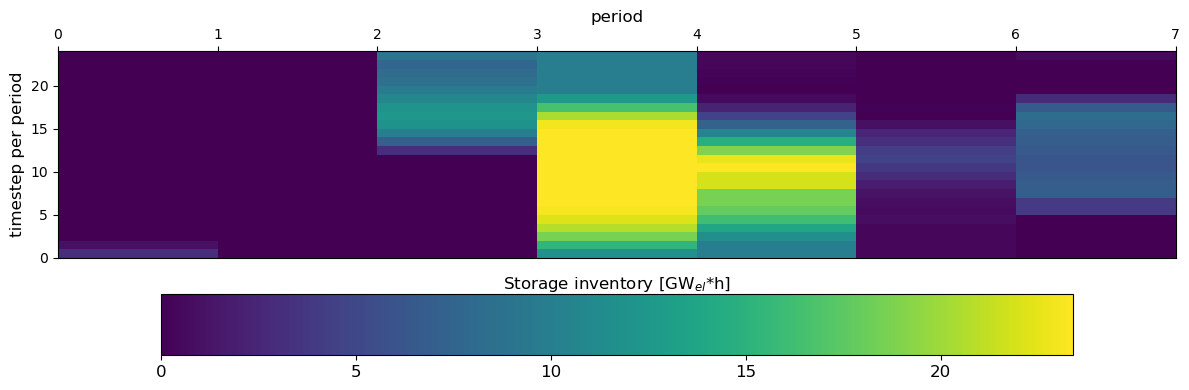

In [15]:
# NBVAL_IGNORE_OUTPUT

nbPeriods = int(numberOfTimeSteps/24)

fig, ax = fn.plotOperationColorMap(
    esM,
    "Li-ion batteries",
    "GermanyRegion",
    variableName="stateOfChargeOperationVariablesOptimum", nbPeriods=nbPeriods,
)

Show hydrogen storage color map 

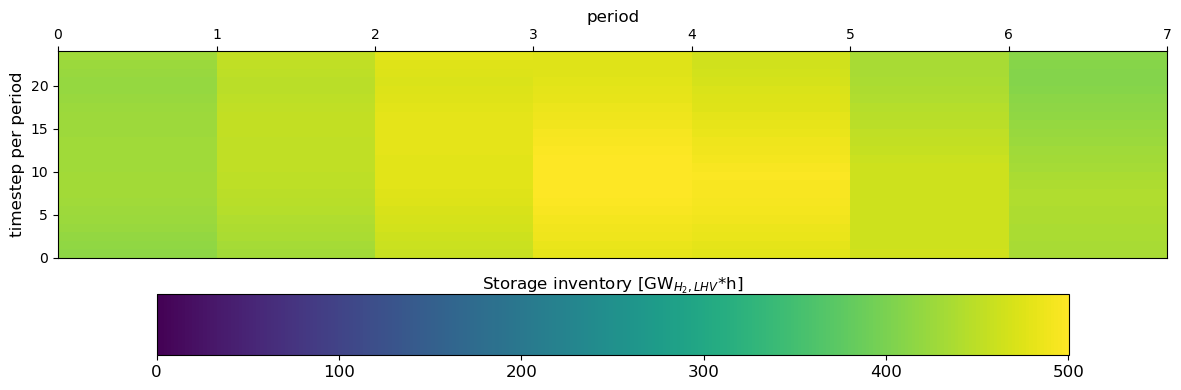

In [16]:
# NBVAL_SKIP
fig, ax = fn.plotOperationColorMap(
    esM,
    "Salt caverns (hydrogen)",
    "GermanyRegion",
    variableName="stateOfChargeOperationVariablesOptimum",nbPeriods=nbPeriods,
)